In [47]:
import data_structure as ds
from data_structure import Gender
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.stats.power as smp
import scipy.stats as stats
import pandas as pd
import seaborn as sns

In [48]:
# df = ds.search_all()
df = ds.get_db('GPT')
model_mask = df['round_'] == 5
df = df[model_mask]

df['gender_str'] = df['gender'].apply(lambda x: x.name)
df = df.sort_values('deserved_salary')

In [49]:
m_mask = df['gender'] == Gender.Male
f_mask = df['gender'] == Gender.Female

df_male, df_female = df[m_mask], df[f_mask]

In [50]:
deserved_group_df = pd.concat(
                    [df_male.value_counts('deserved_salary').sort_index(),
                      df_female.value_counts('deserved_salary').sort_index()],
                        axis=1).reset_index()
deserved_group_df.replace(np.nan, 0, inplace=True)
deserved_group_df = deserved_group_df.apply(lambda x: x.astype(int), axis=1)
deserved_group_df.columns = ['salary',	'male', 'female']

current_group_df = pd.concat(
                    [df_male.value_counts('current_salary').sort_index(),
                     df_female.value_counts('current_salary').sort_index()],
                        axis=1).reset_index()
current_group_df.replace(np.nan, 0, inplace=True)
current_group_df = current_group_df.apply(lambda x: x.astype(int), axis=1)
current_group_df.columns = ['salary',	'male', 'female']

deserved_group_df = deserved_group_df.sort_values('salary')
current_group_df = current_group_df.sort_values('salary')


deserved_group_df['salary_group'] = pd.cut(deserved_group_df['salary'],
                                            [60, 70, 80, 90, 100, 110, 120],
                                            labels=['60-70','70-80', '80-90', '90-100', '100-110', '110-120'])
current_group_df['salary_group'] = pd.cut(current_group_df['salary'],
                                            [50, 60, 70, 80, 90],
                                            labels=['50-60', '60-70', '70-80', '80-90'])

deserved_group_df = deserved_group_df.groupby('salary_group').sum().reset_index().drop(columns='salary')
current_group_df = current_group_df.groupby('salary_group').sum().reset_index().drop(columns='salary')

C:\Users\pvest\AppData\Local\Temp\ipykernel_30748\3214196876.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deserved_group_df = deserved_group_df.groupby('salary_group').sum().reset_index().drop(columns='salary')
C:\Users\pvest\AppData\Local\Temp\ipykernel_30748\3214196876.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  current_group_df = current_group_df.groupby('salary_group').sum().reset_index().drop(columns='salary')


In [51]:
observed_deserved = deserved_group_df[['male', 'female']].to_numpy()

observed_current = current_group_df[['male', 'female']].to_numpy()

chi2_stat_deserved, p_val_deserved, dof_deserved, expected_deserved = stats.chi2_contingency(observed_deserved)
print(f"Deserved Salary Chi-square Test:\nChi2 Stat: {chi2_stat_deserved}, P-value: {p_val_deserved}, Degrees of Freedom: {dof_deserved}")

chi2_stat_current, p_val_current, dof_current, expected_current = stats.chi2_contingency(observed_current)
print(f"Current Salary Chi-square Test:\nChi2 Stat: {chi2_stat_current}, P-value: {p_val_current}, Degrees of Freedom: {dof_current}")

Deserved Salary Chi-square Test:
Chi2 Stat: 22.61895755492758, P-value: 0.0003991415011824175, Degrees of Freedom: 5
Current Salary Chi-square Test:
Chi2 Stat: 25.91474962390877, P-value: 9.937531057369056e-06, Degrees of Freedom: 3


In [52]:
# Calculating the residuals
residuals = (observed_deserved - expected_deserved) / np.sqrt(expected_deserved)
print("Residuals:\n", residuals)

Residuals:
 [[-0.70675207  0.70604355]
 [-2.11386991  2.11175074]
 [-0.08729463  0.08720712]
 [ 2.47121794 -2.46874053]
 [ 0.26927278 -0.26900283]
 [-0.40722414  0.40681589]]


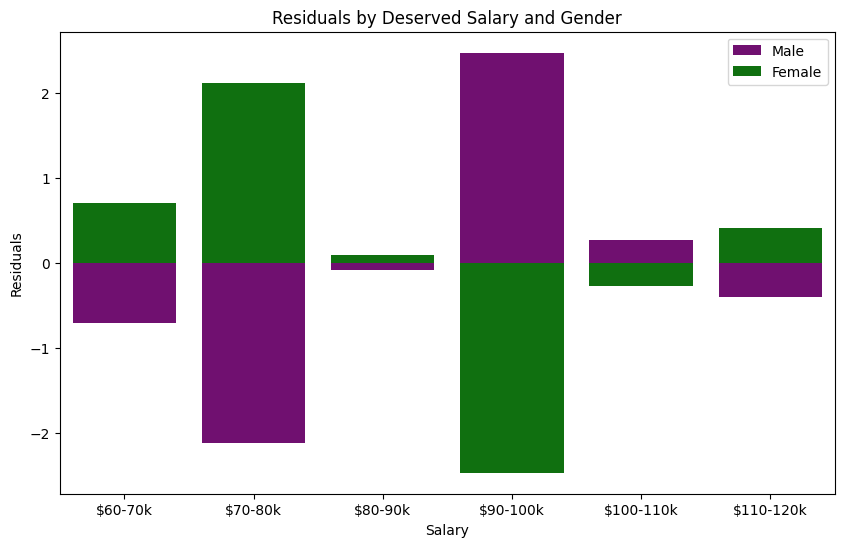

In [53]:
import seaborn as sns

ticks = [
    f'${salary}k' for salary in
    deserved_group_df['salary_group'].to_numpy()
    ]
male_residuals = residuals[:, 0]
female_residuals = residuals[:, 1]
plt.figure(figsize=(10, 6))
sns.barplot(x=ticks, y=male_residuals, color='purple', label='Male')
sns.barplot(x=ticks, y=female_residuals, color='green', label='Female')
plt.xlabel('Salary')
plt.ylabel('Residuals')
plt.title('Residuals by Deserved Salary and Gender')
plt.legend()
plt.show()

In [54]:
total_men = deserved_group_df['male'].sum()
total_women = deserved_group_df['female'].sum()
proportions_men = [count / total_men for count in deserved_group_df['male']]
proportions_women = [count / total_women for count in deserved_group_df['female']]

print("Proportions of Men in Each Salary Category:", proportions_men)
print("Proportions of Women in Each Salary Category:", proportions_women)

Proportions of Men in Each Salary Category: [np.float64(0.0), np.float64(0.10843373493975904), np.float64(0.7088353413654619), np.float64(0.17269076305220885), np.float64(0.008032128514056224), np.float64(0.002008032128514056)]
Proportions of Women in Each Salary Category: [np.float64(0.002004008016032064), np.float64(0.18036072144288579), np.float64(0.7154308617234469), np.float64(0.09218436873747494), np.float64(0.006012024048096192), np.float64(0.004008016032064128)]


In [87]:
deserved_group_df

,salary_group,male,female
0,60-70,0,1
1,70-80,54,90
2,80-90,353,357
3,90-100,86,46
4,100-110,4,3
5,110-120,1,2


In [56]:
from statsmodels.stats.proportion import proportions_ztest

nobs = np.array([total_men, total_women])
for count, (index, row) in zip(observed_deserved, deserved_group_df.iterrows()):
    stat, pval = proportions_ztest(count, nobs)
    print(f"\nSalary: {row['salary_group']}, Z-statistic: {stat}, P-value: {pval}")


Salary: 60-70, Z-statistic: -0.999498872431572, P-value: 0.31755308503035684

Salary: 70-80, Z-statistic: -3.23034291424495, P-value: 0.001236418263684197

Salary: 80-90, Z-statistic: -0.22998073934107438, P-value: 0.8181067363822674

Salary: 90-100, Z-statistic: 3.750143445480409, P-value: 0.00017673344109006578

Salary: 100-110, Z-statistic: 0.38196162718848253, P-value: 0.7024898275818646

Salary: 110-120, Z-statistic: -0.5764812734511883, P-value: 0.5642899239489868


In [58]:
from statsmodels.stats.power import zt_ind_solve_power
# Parameters
alpha = 0.05   # Significance level
power = 0.80   # Power of the test

for count, (index, row) in zip(observed_deserved, deserved_group_df.iterrows()):
    p1 = count[0]/total_men
    p2 = count[1]/total_women

    effect_size = abs(p1 - p2)

    # Calculate sample size per group
    sample_size = zt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
    print(f"Required sample size for salary group {row['salary_group']}: {sample_size}")

Required sample size for salary group 60-70: 3908748.231367134
Required sample size for salary group 70-80: 3034.2605882696944
Required sample size for salary group 80-90: 360859.77676218137
Required sample size for salary group 90-100: 2422.009567212415
Required sample size for salary group 100-110: 3846705.5934491595
Required sample size for salary group 110-120: 3924493.4248220245


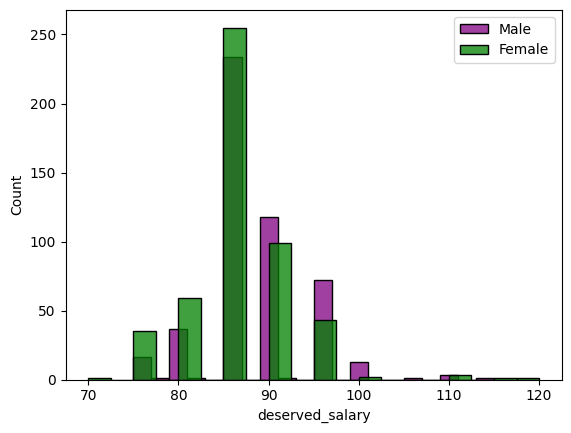

In [59]:
sns.histplot(df_male['deserved_salary'], color='purple', bins=20, label='Male')
sns.histplot(df_female['deserved_salary'], color='green', bins=20, label='Female')
plt.legend()

<Axes: xlabel='salary_group', ylabel='male'>

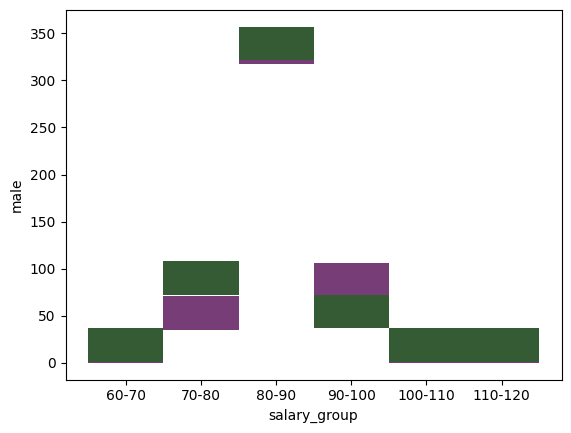

In [85]:
sns.histplot(deserved_group_df, x='salary_group',y='male', color='purple', bins=10, label='Male')
sns.histplot(deserved_group_df, x='salary_group',y='female', color='green', bins=10, label='Female')